# Model Evaluation

## What is Model Evaluation?

- Model evaluation is used to check the performance how well a trained machine learning model performs on unseen data.
- It helps in understanding whether the model predictions are correct or incorrect.
- Different metrics are used because accuracy alone is not always sufficient.


## Why Model Evaluation is Needed?

- To measure model performance  
- To compare different models  
- To detect overfitting or underfitting  
- To choose the best model for real-world use  


### Confusion Matrix

- A confusion matrix is a table used to evaluate classification models.
- It compares:
    - Actual values  
    - Predicted values  


### Confusion Matrix

| Actual / Predicted | Positive | Negative |
|--------------------|----------|----------|
| Positive           | True Positive (TP) | False Negative (FN) |
| Negative           | False Positive (FP) | True Negative (TN) |

## Example

### Step 1: Problem statement

A machine learning model is used to predict whether a patient has disease.
- Positive (1) → patient has disease  
- Negative (0) → patient doesn't have disease  

### Step 2: Actual results

Suppose we take 10 patients

- 4 patients actually have disease  
- 6 patients are healthy  

### Step 3: Model prediction

After prediction,

- 3 diseased patients correctly identified  
- 1 diseased patient missed  
- 1 healthy patient wrongly marked as disease  
- 5 healthy patients correctly identified  

### Step 4: Confusion matrix

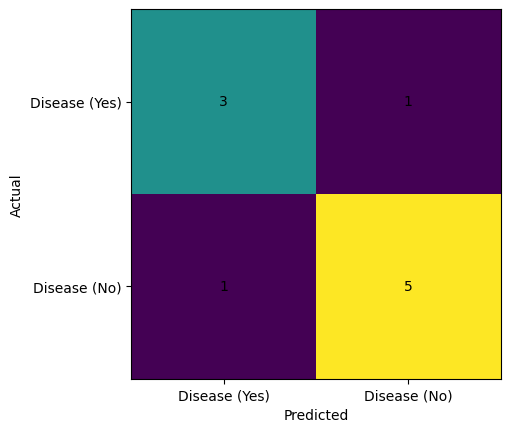

## Accuracy

Accuracy means how many predictions are correct out of total predictions.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

### Step 5:

$$
\begin{aligned}
\text{Accuracy} &= \frac{3 + 5}{3 + 5 + 1 + 1} \\
                &= \frac{8}{10} \\
                &= 0.8
\end{aligned}
$$

## Precision

Precision measures how many predicted positive values are actually correct.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

### Step 6:

$$
\begin{aligned}
\text{Precision} &= \frac{3}{3 + 1} \\
                 &= \frac{3}{4} \\
                 &= 0.75
\end{aligned}
$$

## Recall

Recall measures how many actual positive cases are correctly predicted.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### Step 7: Recall

$$
\begin{aligned}
\text{Recall} &= \frac{3}{3 + 1} \\
              &= \frac{3}{4} \\
              &= 0.75
\end{aligned}
$$

## F1 Score

F1 score is the harmonic mean of precision and recall.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### Step 8: F1 Score

$$
\begin{aligned}
F1 &= 2 \times \frac{0.75 \times 0.75}{0.75 + 0.75} \\
   &= 2 \times \frac{0.575}{1.5} \\
   &= 2 \times 0.37 \\
   &= 0.75
\end{aligned}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#1 = Disease, 0 = No Disease
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]

In [3]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[5 1]
 [1 3]]


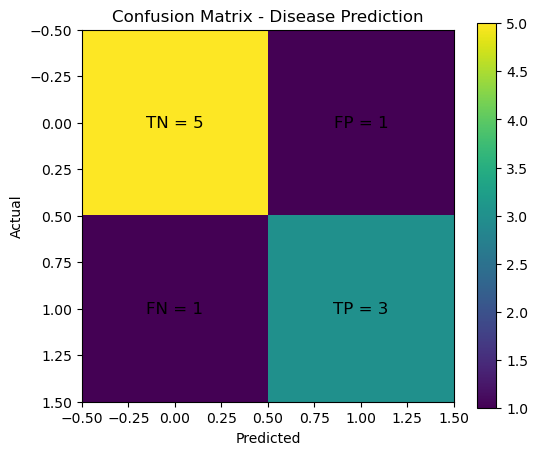

In [4]:
plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Confusion Matrix - Disease Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

labels = [["TN", "FP"], ["FN", "TP"]]

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{labels[i][j]} = {cm[i][j]}",
                 ha="center", va="center", fontsize=12)

plt.show()

In [5]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8
Precision: 0.75
Recall: 0.75
F1-score: 0.75


## What is ROC Curve?

ROC (Receiver Operating Characteristic) Curve is a graph that shows how well a binary classification model can separate positive and negative classes at different threshold values.

### It plots:
- **X-axis:** False Positive Rate (FPR)
- **Y-axis:** True Positive Rate (TPR)

## What is AUC?

AUC (Area Under the ROC Curve) is a single number that summarizes the ROC curve.

- **AUC = 1.0** → Perfect model  
- **AUC = 0.5** → Random guessing  

### Formulae

**TPR (True Positive Rate):**

$$
\text TPR = \frac{TP}{TP + FN}
$$

**FPR (False Positive Rate):**

$$
\text FPR = \frac{FP}{FP + TN}
$$

### Example

- Disease = +ve (1)  
- No Disease = -ve (0)  

| Patient | Actual | Predicted Prob | TP | FP | TPR | FPR |
|--------|--------|----------------|----|----|-----|-----|
| P1 | 1 | 0.95 | 1 | 0 | 1/3 | 0/2 |
| P2 | 1 | 0.85 | 2 | 0 | 2/3 | 0/2 |
| P3 | 0 | 0.70 | 2 | 1 | 2/3 | 1/2 |
| P4 | 0 | 0.40 | 2 | 2 | 2/3 | 2/2 |
| P5 | 1 | 0.10 | 3 | 2 | 3/3 | 2/2 |

### TPR values
- 1/3 = 0.3  
- 2/3 = 0.6  
- 2/3 = 0.6  
- 2/3 = 0.6  
- 3/3 = 1  

### FPR values
- 0/2 = 0  
- 0/2 = 0  
- 1/2 = 0.5  
- 2/2 = 1  
- 2/2 = 1  


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [7]:
y_true = np.array([1, 1, 0, 0, 1])
y_scores = np.array([0.95, 0.85, 0.70, 0.40, 0.30])

In [8]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

AUC: 0.6666666666666666


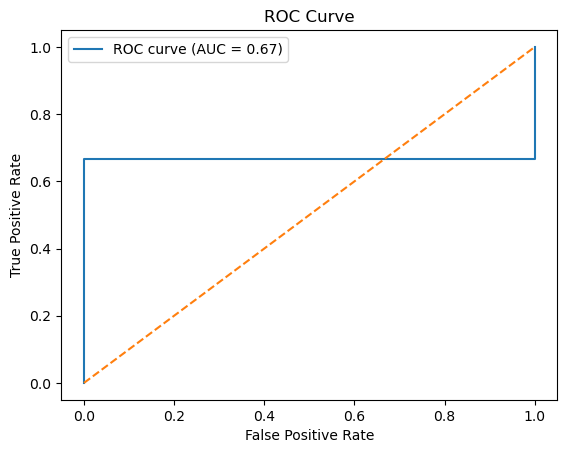

In [9]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--') # Random Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()